<a href="https://colab.research.google.com/github/julianchete/03MAIR---Algoritmos-de-optimizacion---2019/blob/master/AG3/AG3_Julian_Grijalba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Julian Grijalba : AG3 <br>
####Actividad Guiada 3   <br>
[Acceso a la Actividad Guiada 3: AG3](https://github.com/julianchete/03MAIR---Algoritmos-de-optimizacion---2019/tree/master/AG3)


La actividad la desarrollaré en varios pasos, los cuales son: 
1. Configuración entorno agente viajero y definición funciones globales
2. Busqueda aleatoria
3. Busqueda Local
4. Recorrido sumulado
5. Hormigas
6. Visualización de grafos resultantes

## Librerias y variables globales

#1. Configuración entorno agente viajero y definición funciones globales


In [77]:
# incluir libreria en el entonro
!pip install tsplib95
!pip install networkx

In [0]:
# Importa las librerias requeridas y creo las listas 
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import tsplib95
import random
from math import e

# Archivo que se usará en la actividad
archivo = "swiss42.tsp"
urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", archivo)


# Se carga los datos del problema 
problema = tsplib95.load_problem(archivo)
#Nodos
Nodos = list(problema.get_nodes())
#Aristas
Aristas = list(problema.get_edges())

In [43]:
#Se visualizan los nodos y sus aristas
print("Nodos", Nodos)
print("Aristas", Aristas)


Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

## Funciones de la solución

In [0]:
# Función que se utilizan para el ejercicio

#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
      
      
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 


#Devuelve la distancia entre dos nodos
def distancia(a,b, problema):
  return problema.wfunc(a,b)


#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problema):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problema)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problema)

## Prueba de las funciones definidas

In [45]:
solucion = crear_solucion(Nodos)
print("solución: " + str(distancia_total(solucion, problema)))

solución: 4929


# 2. Busqueda Aleatoria

In [0]:
# Metodo de busqueda aleatoria

def busqueda_aleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion, problem)
    
    if distancia < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  


In [47]:
# Se prueba solución con 100 y con 5.000
# 100    
sol = busqueda_aleatoria(problema, 100)

Mejor solución: [0, 16, 31, 4, 14, 38, 30, 19, 35, 41, 32, 7, 12, 11, 37, 5, 2, 6, 10, 9, 27, 40, 39, 29, 22, 34, 23, 25, 18, 1, 13, 3, 33, 20, 28, 15, 24, 21, 8, 17, 36, 26]
Distancia     : 4174


In [48]:
# 5.000 - la disminución no es sustancial 
sol = busqueda_aleatoria(problema, 5000)

Mejor solución: [0, 30, 39, 9, 10, 40, 24, 11, 12, 34, 21, 37, 14, 26, 18, 20, 1, 25, 41, 16, 19, 8, 23, 29, 38, 2, 13, 15, 31, 22, 7, 36, 35, 33, 32, 17, 28, 3, 5, 6, 27, 4]
Distancia     : 3589


# 3. Busqueda Local

In [0]:

def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      
      
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      
      
      
      distancia_vecina = distancia_total(vecina, problema)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

# se prueban la función
#solucion = crear_solucion(Nodos)
#print(solucion)
#nueva_solucion = genera_vecina(solucion)
#print(nueva_solucion)
 
def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = 10e100
  
  Nodos = list(problema.get_nodes())
  
  solucion_referencia = crear_solucion(Nodos)

  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina, problema)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
  
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

In [50]:
# Se prueba solución con 100 y con 5.000
sol = busqueda_local(problema, 100)

Mejor solución: [0, 6, 1, 20, 33, 35, 36, 31, 17, 7, 37, 15, 16, 14, 19, 13, 25, 41, 23, 9, 29, 30, 28, 4, 5, 26, 40, 24, 21, 39, 22, 38, 34, 32, 3, 27, 2, 8, 10, 11, 12, 18]
Distancia     : 1755


In [51]:
# 5.000 - la disminución no es sustancial 
sol = busqueda_local(problema, 5000)

Mejor solución: [0, 27, 2, 8, 9, 23, 41, 25, 10, 4, 31, 17, 36, 35, 20, 33, 34, 32, 1, 6, 5, 26, 18, 12, 11, 13, 19, 14, 16, 15, 37, 7, 3, 28, 29, 39, 21, 40, 24, 22, 38, 30]
Distancia     : 1621


In [0]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
  return vecina


def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False

def bajar_temperatura(T):
  return T-1

#4. Recorrido simulado

In [0]:
def recorrido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
    print("La mejor solución encontrada es " , end="")
    print(mejor_solucion)
    print("con una distancia total de " , end="")
    print(mejor_distancia)
    return mejor_solucion

In [58]:
# Se prueba solución con 100 y con 5000
# 100    
sol = recorrido_simulado(problema, 100)

La mejor solución encontrada es [0, 30, 3, 9, 10, 28, 39, 24, 37, 11, 14, 15, 19, 1, 40, 18, 38, 33, 32, 4, 26, 2, 25, 12, 23, 41, 21, 29, 17, 35, 36, 6, 31, 13, 20, 16, 34, 5, 8, 22, 7, 27]
con una distancia total de 4019


In [59]:
# 5.000 - la disminución no es sustancial 
sol = recorrido_simulado(problema, 5000)

La mejor solución encontrada es [0, 14, 7, 1, 3, 36, 5, 39, 21, 24, 2, 22, 28, 29, 30, 26, 13, 27, 4, 25, 19, 23, 38, 33, 32, 40, 9, 41, 20, 31, 34, 8, 12, 18, 37, 15, 16, 11, 10, 35, 17, 6]
con una distancia total de 3599


#5. Hormigas

In [0]:
def Add_Nodo(problem, H ,T ):
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H ):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T ):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

def hormigas(problem, N) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())
    #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :
      
      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

In [69]:
# Se prueba solución con 100 y con 5000
# 100    
sol = hormigas(problema, 100)

La mejor solución encontrada es [0, 12, 34, 28, 13, 39, 23, 1, 4, 41, 11, 38, 33, 3, 27, 40, 20, 16, 6, 31, 35, 32, 37, 14, 17, 36, 19, 25, 2, 21, 7, 15, 30, 9, 29, 8, 24, 22, 10, 18, 26, 5]
con una distancia total de 4030


In [70]:
# 5.000 - la disminución no es sustancial 
sol = hormigas(problema, 5000)

La mejor solución encontrada es [0, 29, 2, 30, 7, 35, 3, 27, 38, 24, 40, 41, 11, 25, 13, 15, 22, 23, 9, 4, 21, 10, 34, 6, 28, 12, 5, 16, 17, 19, 31, 8, 39, 1, 26, 18, 37, 20, 33, 14, 36, 32]
con una distancia total de 3738


#6.Visualización de grafos resultantes

In [0]:
def dibujar_grafo(Nodos, Aristas):
  
  G=nx.Graph()
  
  G.clear()

  #Dibuja los nodos
  G.add_nodes_from(Nodos)
  print(Nodos)


  #Dibuja aristas
  aristas = Aristas +  [(70 ,1 )]
  #print(aristas)
  G.add_edges_from(aristas)
  labels = {}
  for idx, node in enumerate(G.nodes()):
      labels[node] =  idx 

  nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )
  Nodos = list(map( lambda x:problema.get_display(x) ,problema.get_nodes()))
  Aristas = list(map(lambda x: (x,x+1), problema.get_nodes()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


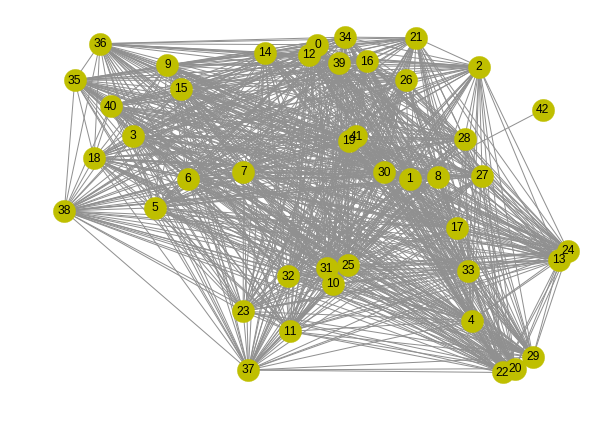

In [82]:
# Dibujar grafos
dibujar_grafo(Nodos, Aristas)
